In [41]:
from astropy.io import fits
from astropy.table import Table
import matplotlib.pyplot as plt

In [30]:
hdul_image = fits.open('spectral_tests/M_p5500g4.0z0.00t1.0_a0.00c0.00n0.00o0.00r0.00s0.00_VIS.spec.FITS')

In [31]:
hdul_image.info()

Filename: spectral_tests/M_p5500g4.0z0.00t1.0_a0.00c0.00n0.00o0.00r0.00s0.00_VIS.spec.FITS
No.    Name      Ver    Type      Cards   Dimensions   Format
  0  PRIMARY       1 PrimaryHDU      16   (46056,)   uint8   
  1  M_p5500g4.0z0.00t1.0_a0.00c0.00n0.00o0.00r0.00s0.00_VIS.spec    1 BinTableHDU     30   450001R x 3C   [D, E, E]   


In [59]:
data = hdul_image[1].data
header = hdul_image[1].header

events = Table.read(hdul_image, hdu = 1)
wave_length = events['wavelength']
flux = events['flux']
normalized_flux = events['normalized flux']

In [60]:
print(events.columns)

<TableColumns names=('wavelength','flux','normalized flux')>


In [61]:
print(wave_length)

wavelength
    A     
----------
    3000.0
   3000.02
   3000.04
   3000.06
   3000.08
    3000.1
   3000.12
   3000.14
   3000.16
       ...
  11999.82
  11999.84
  11999.86
  11999.88
   11999.9
  11999.92
  11999.94
  11999.96
  11999.98
   12000.0
Length = 450001 rows


In [62]:
print(flux)

      flux     
erg / (A s cm2)
---------------
      2514100.0
      2352500.0
       756030.0
       361130.0
       577240.0
      1714200.0
      1844300.0
      1151900.0
      1728500.0
            ...
      2024100.0
      2024200.0
      2024300.0
      2024500.0
      2024600.0
      2024700.0
      2024700.0
      2024800.0
      2024800.0
      2024800.0
Length = 450001 rows


In [63]:
def flux_wavel_plot(flux, wave_length):
        plt.plot(wave_length, flux)
        plt.xlabel(r'$\lambda$ - Wave Length')
        plt.ylabel(r'$\phi$ - Flux')
        plt.title(r'Flux ($\phi$) vs Wave length ($\lambda$)')
        plt.legend()
        plt.grid(True)
        plt.show()

/var/folders/vw/fb5g0yw578jfpvmgdl2bgkr80000gn/T/ipykernel_15782/1846186659.py:6: UserWarning: No artists with labels found to put in legend.  Note that artists whose label start with an underscore are ignored when legend() is called with no argument.
  plt.legend()


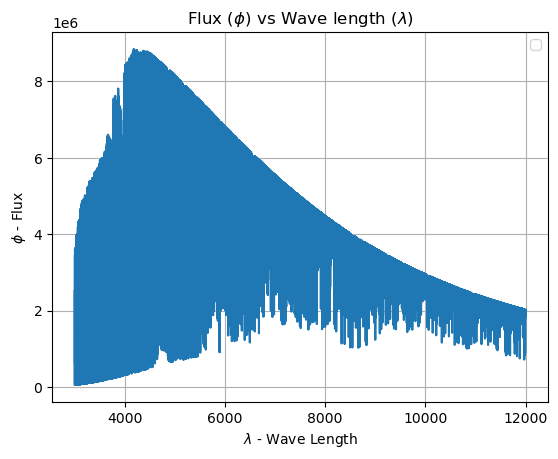

In [66]:
# Flux vs Wave Length
flux_wavel_plot(flux, wave_length)

/var/folders/vw/fb5g0yw578jfpvmgdl2bgkr80000gn/T/ipykernel_15782/1846186659.py:6: UserWarning: No artists with labels found to put in legend.  Note that artists whose label start with an underscore are ignored when legend() is called with no argument.
  plt.legend()


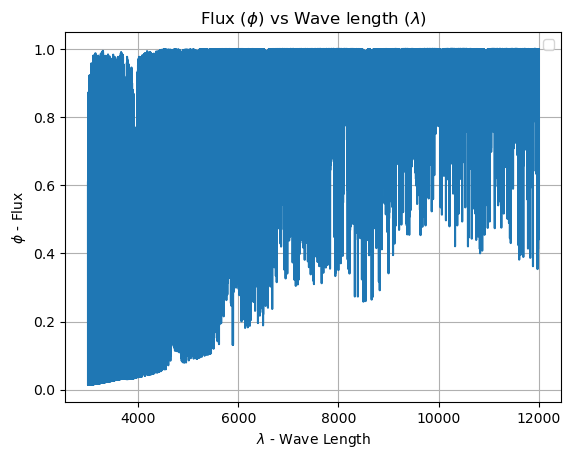

In [67]:
# Normalized flux vs Wavelength
flux_wavel_plot(normalized_flux, wave_length)

In [69]:
spectral_band = (4950, 5050)
mask_band_synth = (wave_length >= spectral_band[0]) & (wave_length <= spectral_band[1])